In [1]:
# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Set up Splinter
browser = Browser('chrome')

In [4]:
### Step 1: Visit the Website

# Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

#    > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.

In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html

In [6]:
### Step 2: Scrape the Table

#Create a Beautiful Soup object and use it to scrape the data in the HTML table.

#Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', class_='table')

In [8]:
# Extract all rows of data
rows = table.find_all('tr', class_='data-row')

In [9]:
### Step 3: Store the Data

# Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

# * `id`: the identification number of a single transmission from the Curiosity rover
# * `terrestrial_date`: the date on Earth
# * `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
# * `ls`: the solar longitude
# * `month`: the Martian month
# * `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
# * `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = {}
    items = row.find_all('td')
    row_data['id'] = items[0].text
    row_data['terrestrial_date'] = items[1].text
    row_data['sol'] = items[2].text
    row_data['ls'] = items[3].text
    row_data['month'] = items[4].text
    row_data['min_temp'] = items[5].text
    row_data['pressure'] = items[6].text
    data.append(row_data)

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data)

In [12]:
# Confirm DataFrame was created successfully
display(df.head())

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [13]:
### Step 4: Prepare Data for Analysis

# Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

#   > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [15]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int32')
df['ls'] = df['ls'].astype('int32')
df['month'] = df['month'].astype('int32')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

In [16]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [17]:
### Step 5: Analyze the Data

# Analyze your dataset by using Pandas functions to answer the following questions:

# 1. How many months exist on Mars?
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
#     * Find the average the minimum daily temperature for all of the months.
#     * Plot the results as a bar chart.
# 4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
#     * Find the average the daily atmospheric pressure of all the months.
#     * Plot the results as a bar chart.
# 5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
#     * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
#     * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"\n1. There are {num_months} months on Mars.")


1. There are 12 months on Mars.


In [19]:
# 2. How many sols (Martian days) worth of data are there?
num_martian_days = df['sol'].nunique()
print(f"\n2. There are {num_martian_days} Martian days worth of data in the dataset.")


2. There are 1867 Martian days worth of data in the dataset.


In [20]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(f"\n3. The average low temperature by month is:\n{avg_min_temp_by_month}")


3. The average low temperature by month is:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


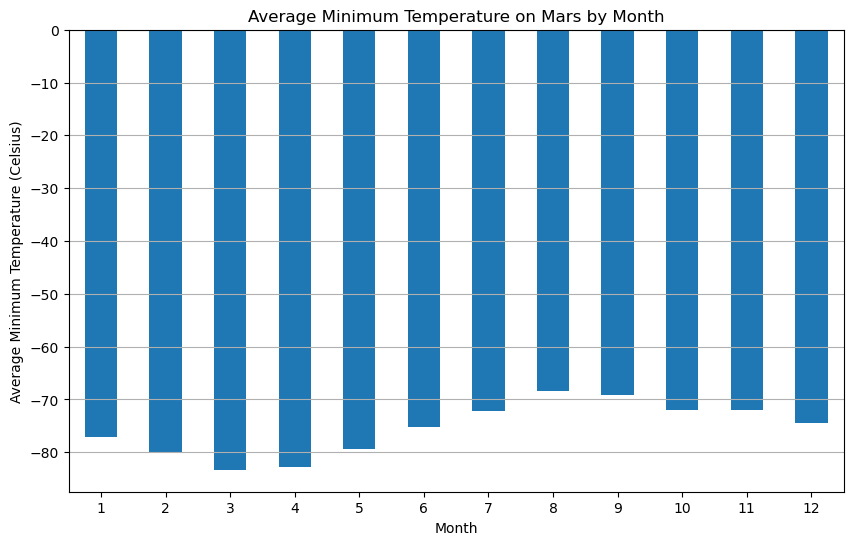

In [21]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar')
plt.title('Average Minimum Temperature on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


4. The coldest month is 3 and the hottest month is 8.


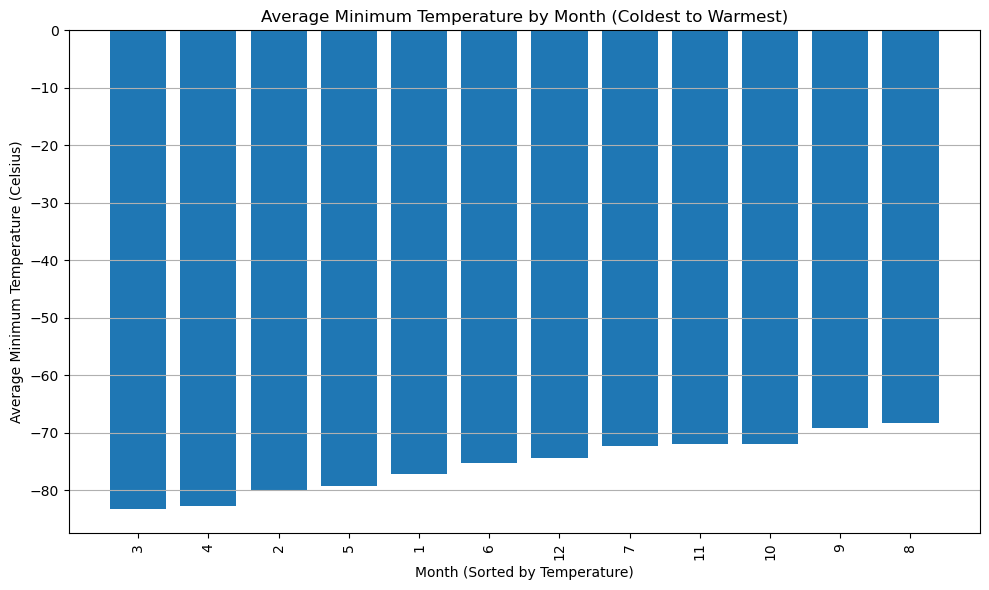

In [22]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()
print(f"\n4. The coldest month is {coldest_month} and the hottest month is {hottest_month}.")

# Sort the average temperatures from coldest to warmest
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

# Create a bar chart of the sorted average temperatures
plt.figure(figsize=(10, 6))
plt.bar(sorted_avg_min_temp.index.astype(str), sorted_avg_min_temp.values)
plt.xlabel('Month (Sorted by Temperature)')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.title('Average Minimum Temperature by Month (Coldest to Warmest)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [23]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
print(f"\n5. The average pressure by month is:\n{avg_pressure_by_month}")


5. The average pressure by month is:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


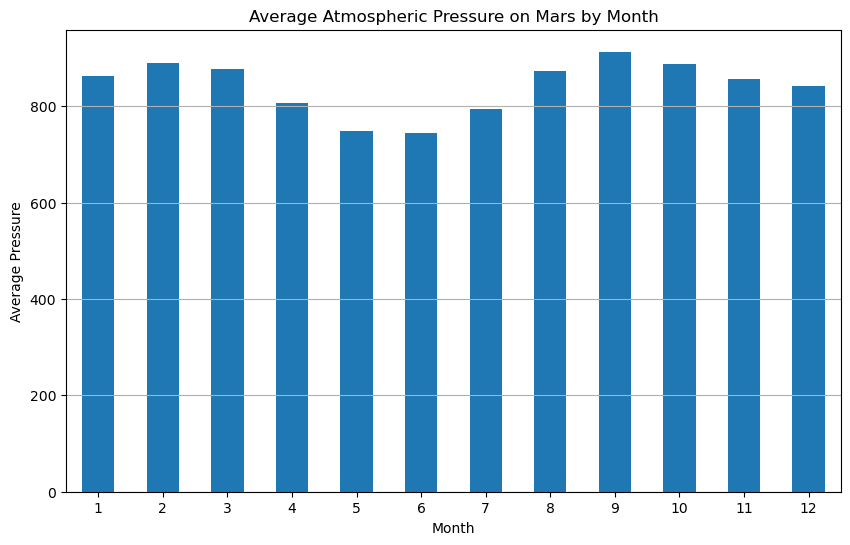

In [24]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar')
plt.title('Average Atmospheric Pressure on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [25]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()
print(f"\n6. The month with the lowest average pressure is {lowest_pressure_month} and the month with the highest average pressure is {highest_pressure_month}")



6. The month with the lowest average pressure is 6 and the month with the highest average pressure is 9


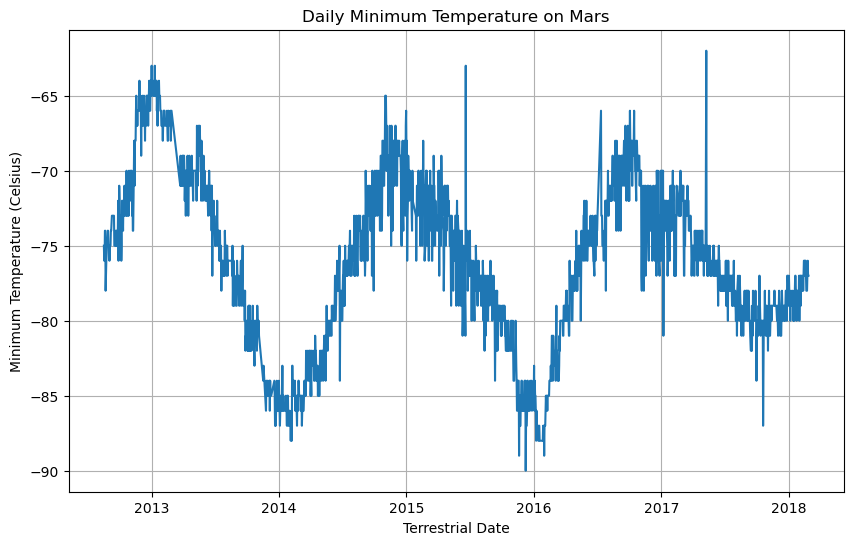


7. By examining the distance between peaks on the plot, there appear to be roughly 675 Earth days in a Martian year


In [26]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'])
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.grid(True)
plt.show()

print(f"\n7. By examining the distance between peaks on the plot, there appear to be roughly 675 Earth days in a Martian year")

In [27]:
#### Minimum Temperature

    # Monthly Averages: The average minimum temperatures fluctuate significantly throughout the Martian year. The coldest months are the 3rd and 4th, 
    # with average minimum temperatures of approximately -83.3°C and -82.7°C, respectively. The warmest month is the 8th, with an average minimum 
    # temperature of -68.4°C.

    # Overall Trend: There's a clear warming trend from month 3 to month 8, followed by a cooling trend from month 9 back to month 3, as shown on the 
    # graph.

    # Graph Discrepancy: The second bar graph that reorders the months by temperature is useful for seeing which months are colder and hotter.

In [28]:
#### Atmospheric Pressure

    # Monthly Averages: The average atmospheric pressure also varies throughout the Martian year. The lowest average pressure is observed in the 6th 
    # month (approximately 745.1), while the highest average pressure occurs in the 9th month (approximately 913.3).

    # Overall Trend: The bar chart for average pressure shows a trend of decreasing pressure from month 2 to month 6, followed by an increase until 
    # month 9, and then a slight decrease.

    # Inverse Relationship with Temperature: Interestingly, there seems to be an inverse relationship between temperature and pressure. The colder 
    # months generally have higher average pressure, while the warmer months have lower average pressure. This could be due to the effect of temperature 
    # on atmospheric density and the behavior of gases (like CO2, which makes up most of the Martian atmosphere) at different temperatures.

In [29]:
#### Year Length

    # Earth Day Comparison: The output indicates that a Martian year is roughly equivalent to 675 Earth days. This estimation was made by analyzing the 
    # peaks in the minimum temperature plot over time. The number of Earth days between consecutive peaks (or troughs) in temperature suggests the length 
    # of a Martian year.

In [30]:
### Step 6: Save the Data

#Export the DataFrame to a CSV file.

In [31]:
# Write the data to a CSV
df.to_csv('mars_temperature_data.csv', index=False)

In [32]:
# Close the browser
browser.quit()